## Load MNIST Data
MNIST is a dataset of images of the numbers 0 to 9. The problem is to classify the images as numbers. Setup libraries and load the MNIST dataset. Display the first few rows to verify that the data loaded. You'll explore the data format after the data loads.

In [1]:
# Load libraries
from os.path import join
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import unittest

In [2]:
# set pandas display options
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.2f}'.format

In [3]:
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
# Load data
mnistDf_backup = pd.read_csv(
    "https://download.mlcc.google.com/mledu-datasets/mnist_train_small.csv",
    sep=",", header=None)

In [5]:
# Shuffle data
mnistDf_backup.sample(frac=1).reset_index(drop=True) # 기존 idx를 drop시키고 0부터 순서

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Use the first 5000 examples for faster prototyping
mnistDf = mnistDf_backup[0:5000]

mnistDf.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
showExample = 2
# digitData = np.reshape(np.array(mnistDf.iloc[showExample, 1:]), [28,28])
digitData = np.array(mnistDf.iloc[showExample, 1:]).reshape(28,28)
print(digitData)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  32
   97 179 254 223  72   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  65 185 235
  253 254 253 253 199   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  37  55   0  61 224 25

## Do you have Imbalanced Classes?
As we read in the course, imbalanced classes make classification harder. Let's look at the distribution of classes. Do you have imbalanced classes?

In [8]:
# Calculate the number of classes
numClasses = mnistDf.iloc[:, 0].unique().shape[0]

([<matplotlib.axis.XTick at 0x232ed8d6280>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

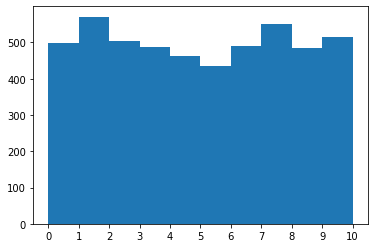

In [9]:
# Plot histogram of class distribution
# (mnistDf.iloc[:, 0]).value_counts().sort_index()
plt.hist(mnistDf.iloc[:, 0], bins=range(numClasses+1))
plt.xticks(range(numClasses+1))

The preceding graph shows that the 10 classes are roughly equally represented.

## Shuffle and Split Dataset
As part of [Data Debugging](https://developers.google.com/machine-learning/testing-debugging/common/data-errors) best practices, ensure your splits are statistically equivalent by shuffling your data to remove any pre-existing order.

In [10]:
mnistDf = mnistDf.sample(frac=1).reset_index(drop=True)

In [11]:
mnistData = mnistDf.iloc[:, 1:].copy(deep=True)
mnistLabels = mnistDf.iloc[:, 0].copy(deep=True)

## Process Data
Scale the data values to `[0,1]` since the values are bounded to `[0,255]` and do not contain outliers. Then check that the scaled data values are as expected by generating summary statistics using the `DataFrame.describe()` function.

Run the following cell to scale data and generate statistics. This cell takes a few minutes to run.

In [12]:
def minMaxScaler(arr):
    max = np.max(arr)
    if(max!=0):  # avoid /0
        min = np.min(arr)
        arr = (arr-min)/max
    return arr

In [13]:
for featureIdx in range(mnistData.shape[1]):
    mnistData.iloc[:,featureIdx] = minMaxScaler(mnistData.iloc[:,featureIdx])

In [14]:
mnistData.describe()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,...,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.02,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00


## Establish Baseline
Following development best practices, you should establish a baseline. The simplest baseline is predicting the most common class. You saw that the most common class is 1. Let's check the accuracy when always predicting 1.

In [15]:
np.sum(mnistLabels==1)*1.0/mnistLabels.shape[0]*100

11.42

## Train a Linear Model
Let's start nice and easy with a linear model. All we need is an accuracy > 11%.

First, let's define a function to plot our loss and accuracy curves. The function will also print the final loss and accuracy. Instead of using `verbose=1`, you can call the function.

In [16]:
def showClassificationResults(trainHistory):
    print('Final training loss: ' + str(trainHistory.history['loss'][-1]))
    print('Final validation loss: ' + str(trainHistory.history['val_loss'][-1]))
    print('Final training accuracy: ' + str(trainHistory.history['accuracy'][-1]))
    print('Final validation accuracy: ' + str(trainHistory.history['val_accuracy'][-1]))
    
    # Plot loss and accuracy curves
    f = plt.figure(figsize=(10,4))
    axLoss = f.add_subplot(121)
    axAcc = f.add_subplot(122)
    axLoss.plot(trainHistory.history['loss'])
    axLoss.plot(trainHistory.history['val_loss'])
    axLoss.legend(['Training loss', 'Validation loss'], loc='best')
    axLoss.set_xlabel('Training epochs')
    axLoss.set_ylabel('Loss')
    axAcc.plot(trainHistory.history['accuracy'])
    axAcc.plot(trainHistory.history['val_accuracy'])
    axAcc.legend(['Training accuracy', 'Validation accuracy'], loc='best')
    axAcc.set_xlabel('Training epochs')
    axAcc.set_ylabel('Accuracy')

Now train a linear model with an output layer and a hidden layer.

Epoch 1/10
40/40 [==============================] - 2s 29ms/step - loss: 7.0537 - accuracy: 0.1390 - val_loss: 4.0598 - val_accuracy: 0.1590
Epoch 2/10
40/40 [==============================] - 1s 19ms/step - loss: 4.0221 - accuracy: 0.1435 - val_loss: 3.9654 - val_accuracy: 0.1970
Epoch 3/10
40/40 [==============================] - 1s 19ms/step - loss: 3.8174 - accuracy: 0.1443 - val_loss: 3.7235 - val_accuracy: 0.1770
Epoch 4/10
40/40 [==============================] - 1s 14ms/step - loss: 3.7539 - accuracy: 0.1398 - val_loss: 3.7479 - val_accuracy: 0.1600
Epoch 5/10
40/40 [==============================] - 1s 18ms/step - loss: 3.6427 - accuracy: 0.1390 - val_loss: 3.6465 - val_accuracy: 0.1490
Epoch 6/10
40/40 [==============================] - 1s 15ms/step - loss: 3.6876 - accuracy: 0.1440 - val_loss: 3.6544 - val_accuracy: 0.1550
Epoch 7/10
40/40 [==============================] - 1s 14ms/step - loss: 3.4965 - accuracy: 0.1412 - val_loss: 3.8149 - val_accuracy: 0.1520
Epoch 8/10
40

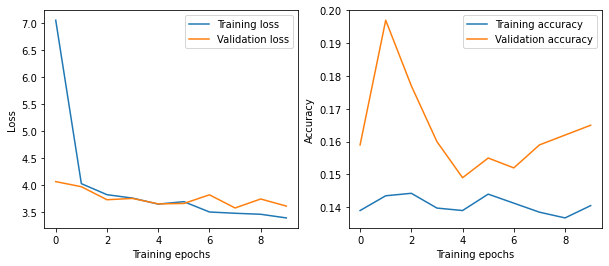

In [17]:
in_dim = mnistData.shape[1]

model = None

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=in_dim, activation='linear', input_dim=in_dim))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])

trainHistory = model.fit(mnistData, mnistLabels, epochs=10, batch_size=100, validation_split=0.2, verbose=1)

# Plot the results
showClassificationResults(trainHistory)

Wow, that accuracy is terrible! What could the cause be?

Hint: You followed the same procedure as for the previous regression problem. Do you need an adaptation for a classification problem? Experiment with the code above or skip to the solution below.

In regression, the last layer uses a linear activation function. In classification, the last layer <span style='color:red'> cannot use a linear transform</span>. Instead, one option is a <span style='color:red'>softmax transform</span>. Furthermore, in regression, the loss is calculated using MSE while in classification, loss is calculated using <span style='color:red'> crossentropy</span>. Before running your model, if you wrote a test to validate the output values, your test would detect the anomalous output. You'll look at such a test later. Move onto the next section to fix the loss calculation.

## Fixing Loss Calculation
Since your labels are integers instead of one-hot encodings, use <span style='color:red'> sparse_categorical_crossentropy</span> instead of <span style='color:red'> categorical_crossentropy</span> so that you avoid converting the integers to one-hot encoding.

Epoch 1/10
45/45 [==============================] - 2s 24ms/step - loss: 0.6746 - accuracy: 0.7938 - val_loss: 0.3850 - val_accuracy: 0.8780
Epoch 2/10
45/45 [==============================] - 1s 14ms/step - loss: 0.3411 - accuracy: 0.8987 - val_loss: 0.3597 - val_accuracy: 0.9000
Epoch 3/10
45/45 [==============================] - 1s 13ms/step - loss: 0.3001 - accuracy: 0.9113 - val_loss: 0.3671 - val_accuracy: 0.9080
Epoch 4/10
45/45 [==============================] - 1s 15ms/step - loss: 0.2657 - accuracy: 0.9233 - val_loss: 0.3788 - val_accuracy: 0.9080
Epoch 5/10
45/45 [==============================] - 1s 15ms/step - loss: 0.2433 - accuracy: 0.9287 - val_loss: 0.3758 - val_accuracy: 0.9040
Epoch 6/10
45/45 [==============================] - 1s 14ms/step - loss: 0.2177 - accuracy: 0.9404 - val_loss: 0.4010 - val_accuracy: 0.9020
Epoch 7/10
45/45 [==============================] - 1s 15ms/step - loss: 0.2024 - accuracy: 0.9447 - val_loss: 0.3971 - val_accuracy: 0.8940
Epoch 8/10
45

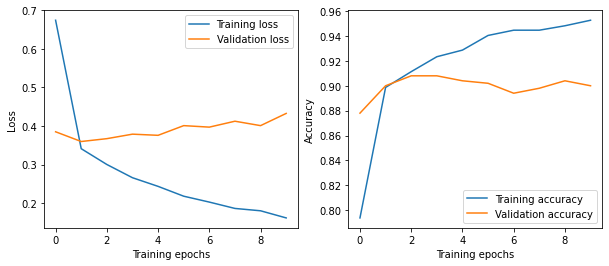

In [18]:
in_dim = mnistData.shape[1]

model = None

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=in_dim, activation='linear', input_dim=in_dim))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])

# trainHistory = model.fit(mnistData, mnistLabels, epochs=10, 
#                          batch_size=100, validation_split=0.1, verbose=1)
trainHistory = model.fit(mnistData, mnistLabels, epochs=10, batch_size=100, validation_split=0.1, verbose=1)

# Plot the results
showClassificationResults(trainHistory)

Your loss curves are much better. Your accuracy has improved too. You're on the right track.

## Train a Nonlinear Model
Switch to a nonlinear model by modifying the code below to use <span style='color:red'>relu activation functions instead of linear activation functions</span>. Run the code. What do you observe?

Epoch 1/10
45/45 [==============================] - 2s 23ms/step - loss: 0.7419 - accuracy: 0.7849 - val_loss: 0.3600 - val_accuracy: 0.9060
Epoch 2/10
45/45 [==============================] - 1s 17ms/step - loss: 0.2957 - accuracy: 0.9158 - val_loss: 0.2920 - val_accuracy: 0.9180
Epoch 3/10
45/45 [==============================] - 1s 14ms/step - loss: 0.2221 - accuracy: 0.9382 - val_loss: 0.2826 - val_accuracy: 0.9300
Epoch 4/10
45/45 [==============================] - 1s 14ms/step - loss: 0.1667 - accuracy: 0.9544 - val_loss: 0.2764 - val_accuracy: 0.9280
Epoch 5/10
45/45 [==============================] - 1s 13ms/step - loss: 0.1200 - accuracy: 0.9713 - val_loss: 0.2594 - val_accuracy: 0.9340
Epoch 6/10
45/45 [==============================] - 1s 17ms/step - loss: 0.0909 - accuracy: 0.9811 - val_loss: 0.2550 - val_accuracy: 0.9360
Epoch 7/10
45/45 [==============================] - 1s 15ms/step - loss: 0.0666 - accuracy: 0.9878 - val_loss: 0.2504 - val_accuracy: 0.9380
Epoch 8/10
45

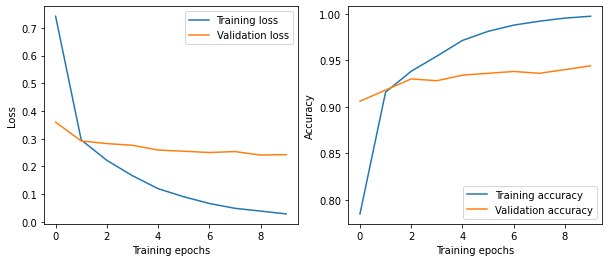

In [20]:
input_dim = mnistData.shape[1]
units = input_dim # 최초 hidden layer의 노드수는 input dim 과 동일히게 진행 (일반적으로)

model = None

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=units, activation='relu', input_dim=input_dim))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

trainHistory = model.fit(mnistData, mnistLabels, 
                         batch_size=100, epochs=10, validation_split=0.1, verbose=1)

# Plot
showClassificationResults(trainHistory)

## Adding a Second Layer
Increasing the model's capacity significantly improved your results. Perhaps you can continue this strategy by adding a second relu layer. Run the following code cell to train the model with another relu layer.

Epoch 1/10
45/45 [==============================] - 2s 35ms/step - loss: 0.6306 - accuracy: 0.8153 - val_loss: 0.3255 - val_accuracy: 0.9060
Epoch 2/10
45/45 [==============================] - 1s 27ms/step - loss: 0.2274 - accuracy: 0.9342 - val_loss: 0.2684 - val_accuracy: 0.9280
Epoch 3/10
45/45 [==============================] - 1s 28ms/step - loss: 0.1365 - accuracy: 0.9580 - val_loss: 0.2324 - val_accuracy: 0.9440
Epoch 4/10
45/45 [==============================] - 1s 28ms/step - loss: 0.0719 - accuracy: 0.9811 - val_loss: 0.2546 - val_accuracy: 0.9420
Epoch 5/10
45/45 [==============================] - 1s 31ms/step - loss: 0.0408 - accuracy: 0.9898 - val_loss: 0.2259 - val_accuracy: 0.9420
Epoch 6/10
45/45 [==============================] - 1s 28ms/step - loss: 0.0216 - accuracy: 0.9953 - val_loss: 0.2382 - val_accuracy: 0.9520
Epoch 7/10
45/45 [==============================] - 1s 33ms/step - loss: 0.0216 - accuracy: 0.9942 - val_loss: 0.2563 - val_accuracy: 0.9500
Epoch 8/10
45

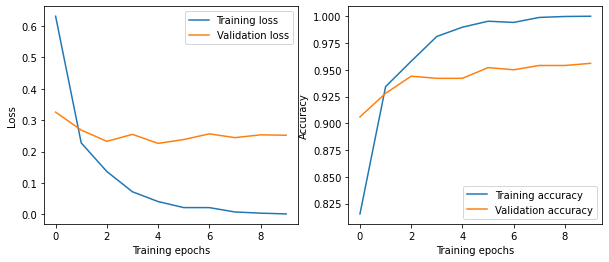

In [21]:
input_dim = mnistData.shape[1]
units = input_dim # 최초 hidden layer의 노드수는 input dim 과 동일히게 진행 (일반적으로)

model = None

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=units, activation='relu', input_dim=input_dim))
model.add(tf.keras.layers.Dense(units=units, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

trainHistory = model.fit(mnistData, mnistLabels, 
                         batch_size=100, epochs=10, validation_split=0.1, verbose=1)

# Plot
showClassificationResults(trainHistory)

Guess what. Your previous model had training and validation accuracies of 100% and 95%. You can't do much better than that! So your new accuracy is about the same. How high can you push your accuracy? With this configuration the highest training and validation accuracies appear to be 100% and 96% respectively. Since the neural net returns similar accuracy with 1 or 2 layers, let's use the simpler model with 1 layer.

Does your model begin to overfit the training data if you train for long enough? (Your model starts overfitting training data at the point when your validation loss starts increasing.)

## Check for Training/Validation Data Skew
Our validation accuracy is a little worse than our training accuracy. While this result is always expected, you should check for typical errors. The commonest cause is having different distributions of data and labels in training and validation. Confirm that the distribution of classes in training and validation data is similar.

([<matplotlib.axis.XTick at 0x232892a5fa0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

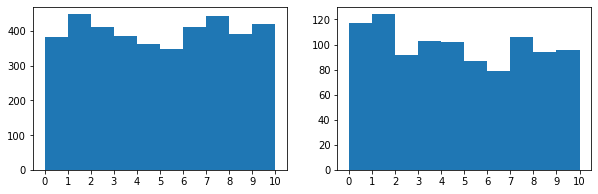

In [27]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(1,2,1)
num_bins = len(mnistLabels.value_counts()) + 1
plt.hist(mnistLabels[0:int(len(mnistLabels)*8/10+0.5)], bins=range(num_bins))
plt.xticks(range(num_bins))

ax2 = f.add_subplot(1,2,2)
plt.hist(mnistLabels[int(len(mnistLabels)*8/10+0.5):], bins=range(num_bins))
plt.xticks(range(num_bins))

## Apply Dropout Regularization
Dropout regularization is a common regularization method that removes a random selection of a fixed number of units in a network layer for a single gradient step. Typically, dropout will improve generalization at a dropout rate of between 10% and 50% of neurons. 

Try to reduce the divergence between training and validation loss by using dropout regularization with values between 0.1 and 0.5. Dropout does not improve the results in this case. However, at a dropout of 0.5, the difference in loss decreases, though both training and validation loss decrease in absolute terms.

Final training loss: 0.10417452454566956
Final validation loss: 0.23219113051891327
Final training accuracy: 0.9753333330154419
Final validation accuracy: 0.9340000152587891


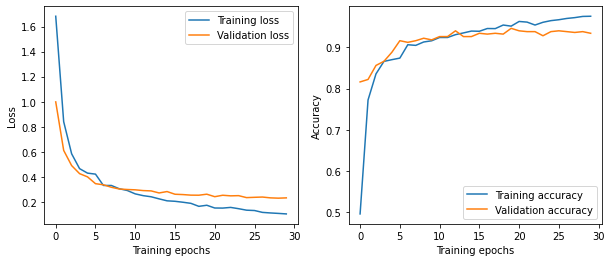

In [34]:
from keras import regularizers

model = None

# Dropout lambda
dropoutLambda = 0.5

model = keras.Sequential()
model.add(tf.keras.layers.Dense(units=input_dim, activation='relu', input_dim=input_dim))
model.add(tf.keras.layers.Dropout(dropoutLambda, noise_shape=(1,input_dim), seed=seed))
# noise_shape : dropout layer에 들어오는 input_shape.
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

trainHistory = model.fit(mnistData, mnistLabels, 
                         batch_size=500, epochs=30, validation_split=0.1, verbose=0)

# Plot
showClassificationResults(trainHistory)

Final training loss: 0.027262184768915176
Final validation loss: 0.2473752796649933
Final training accuracy: 0.9982222318649292
Final validation accuracy: 0.9419999718666077


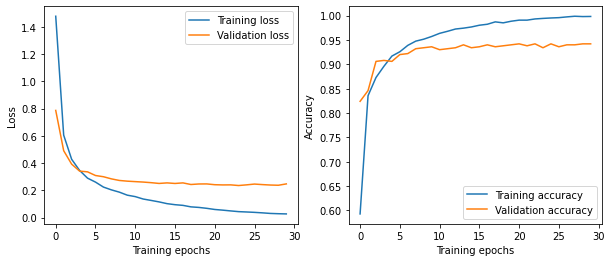

In [35]:
model = None

# Dropout lambda
dropoutLambda = 0.1

model = keras.Sequential()
model.add(tf.keras.layers.Dense(units=input_dim, activation='relu', input_dim=input_dim))
model.add(tf.keras.layers.Dropout(dropoutLambda, noise_shape=(1,input_dim), seed=seed))
# noise_shape : dropout layer에 들어오는 input_shape.
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

trainHistory = model.fit(mnistData, mnistLabels, 
                         batch_size=500, epochs=30, validation_split=0.1, verbose=0)

# Plot
showClassificationResults(trainHistory)

Final training loss: 0.04608340933918953
Final validation loss: 0.2309262752532959
Final training accuracy: 0.992222249507904
Final validation accuracy: 0.9359999895095825


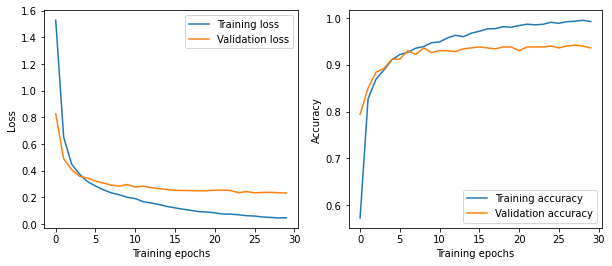

In [36]:
model = None

# Dropout lambda
dropoutLambda = 0.2

model = keras.Sequential()
model.add(tf.keras.layers.Dense(units=input_dim, activation='relu', input_dim=input_dim))
model.add(tf.keras.layers.Dropout(dropoutLambda, noise_shape=(1,input_dim), seed=seed))
# noise_shape : dropout layer에 들어오는 input_shape.
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

trainHistory = model.fit(mnistData, mnistLabels, 
                         batch_size=500, epochs=30, validation_split=0.1, verbose=0)

# Plot
showClassificationResults(trainHistory)

Final training loss: 0.06120524927973747
Final validation loss: 0.23770196735858917
Final training accuracy: 0.988444447517395
Final validation accuracy: 0.9380000233650208


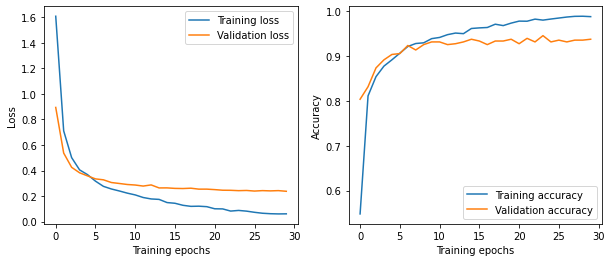

In [37]:
model = None

# Dropout lambda
dropoutLambda = 0.3

model = keras.Sequential()
model.add(tf.keras.layers.Dense(units=input_dim, activation='relu', input_dim=input_dim))
model.add(tf.keras.layers.Dropout(dropoutLambda, noise_shape=(1,input_dim), seed=seed))
# noise_shape : dropout layer에 들어오는 input_shape.
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

trainHistory = model.fit(mnistData, mnistLabels, 
                         batch_size=500, epochs=30, validation_split=0.1, verbose=0)

# Plot
showClassificationResults(trainHistory)

Final training loss: 0.08075889945030212
Final validation loss: 0.22249829769134521
Final training accuracy: 0.9822221994400024
Final validation accuracy: 0.9419999718666077


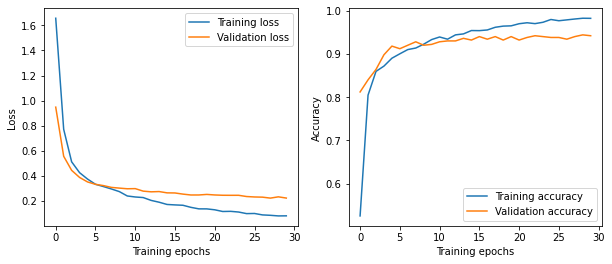

In [38]:
model = None

# Dropout lambda
dropoutLambda = 0.4

model = keras.Sequential()
model.add(tf.keras.layers.Dense(units=input_dim, activation='relu', input_dim=input_dim))
model.add(tf.keras.layers.Dropout(dropoutLambda, noise_shape=(1,input_dim), seed=seed))
# noise_shape : dropout layer에 들어오는 input_shape.
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

trainHistory = model.fit(mnistData, mnistLabels, 
                         batch_size=500, epochs=30, validation_split=0.1, verbose=0)

# Plot
showClassificationResults(trainHistory)

Sample results using dropout regularization after 30 epochs:

Lambda | Training Acc | Validation Acc <br>
------ | -------------------------------------<br>
0.1....| 0.998         | 0.942  <br>
0.2....| 0.992         | 0.935  <br>
0.3....| 0.988         | 0.938  <br>
0.4....| 0.982         | 0.942  <br>
0.5....| 0.975         | 0.934  <br>

dropoutLambda가 0.1 일 경우, 가장 좋은 결과 보임

## Check Accuracy for Data Slices
<span style='color:red'>For classification problems, you should always check the metrics by class to ensure your model predicts well across all classes</span>. Check accuracy on the 10 classes by running the next cell by using the function `sklearn.metrics.classification_report` from the scikit-learn library. In the output, the rows with indices 0 to 9 correspond to the classes for the labels 0 to 9. The columns "Precision", "Recall", and "[F1-Score](https://en.wikipedia.org/wiki/F1_score)" correspond to the respective classification metrics for each class. "Support" is the number of examples for the class in question. For example, for the label "4", when predicting on 464 examples labelled "4", the model has a precision of 0.98, a recall of 0.97, and a F1 score of 0.98.

The classification metrics are very uniform across all classes, which is perfect. In your classification problem, in case any metric is lower for a class, then you should investigate why the model has lower-quality predictions for that class.

In [47]:
from sklearn.metrics import classification_report
# mnistPred = model.predict_classes(x= mnistData) # => predicr_classes 없어짐.
mnistPred = model.predict(x = mnistData) 
mnistPred = np.argmax(mnistPred, axis=1)
print(classification_report(mnistLabels, mnistPred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       499
           1       0.98      0.99      0.99       571
           2       0.98      0.99      0.98       504
           3       0.99      0.97      0.98       487
           4       0.99      0.98      0.99       464
           5       0.98      0.99      0.99       434
           6       1.00      0.99      0.99       491
           7       0.98      0.99      0.98       550
           8       0.99      0.99      0.99       485
           9       0.98      0.98      0.98       515

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



## Testing for Anomalous Values
In the section [Train a Linear Model](https://colab.corp.google.com/google_src/cloud/karangill/mlcc/google3/engedu/ml/capitalg/colab/testing_debugging_classification.ipynb#scrollTo=B6AOgLcC5nwp), you debugged an incorrect calculation of loss. Before running your model, if you wrote a test to validate the output values, your test would detect the anomalous output. For example, you could test whether the distribution of predicted labels on the training dataset is similar to the actual distribution of training labels. A simple statistical implementation of this concept is to compare the standard deviation and mean of the predicted and actual labels.

First, check the standard deviation and mean of the actual labels.

In [49]:
print('Mean of actual labels: ' + str(np.mean(mnistLabels)))
print('Standard deviation of actual labels: ' + str(np.std(mnistLabels)))

Mean of actual labels: 4.4754
Standard deviation of actual labels: 2.914754679214016


In [50]:
print('Mean of predicted labels: ' + str(np.mean(mnistPred)))
print('Standard deviation of predicted labels: ' + str(np.std(mnistPred)))

Mean of predicted labels: 4.4738
Standard deviation of predicted labels: 2.916524225855153


예측값의 분포(평균(np.mean(mnistPred)), 표준편차)가 실제값(np.mean(mnistLabels) 등)의 분포와 상당한 유사성을 보이므로 좋은 결과를 도출하였다고 판단.

Write tests to check if the mean and standard deviation of the predicted labels falls within the expected range. The expected range defined in the tests below is somewhat arbitrary. In practice, you will tune the range thresholds to accommodate natural variation in predictions.

In [54]:
class mlTest(unittest.TestCase):
    def testStd(self):
        y = model.predict(mnistData)
        yStd = np.std(y)
        yStdActual = np.std(mnistLabels)
        deltaStd = 0.05
        errorMsg = 'Std. dev. of predicted values ' + str(yStd) + \
                   ' and actual values ' + str(yStdActual) + \
                   ' differs by >' + str(deltaStd) + '.'
        self.assertAlmostEqual(yStd, yStdActual, delta=deltaStd, msg=errorMsg)
        
    def testMean(self):
        y = model.predict(mnistData)
        yMean = np.mean(y)
        yMeanActual = np.mean(mnistLabels)
        deltaMean = 0.05
        errorMsg = 'Mean of predicted values ' + str(yMean) + \
                   ' and actual values ' + str(yMeanActual) + \
                   ' differs by >' + str(deltaMean) + '.'
        self.assertAlmostEqual(yMean, yMeanActual, delta=deltaMean, msg=errorMsg)

In [55]:
# Train model and run tests
input_dim = mnistData.shape[1]

model = None

model = keras.Sequential()
model.add(tf.keras.layers.Dense(units=input_dim, activation='linear', input_dim=input_dim))
model.add(keras.layers.Dense(1, activation='linear'))

model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])

trainHistory = model.fit(mnistData, mnistLabels, 
                         epochs= 10, batch_size=100, validation_split=0.1, verbose=0)

suite = unittest.TestLoader().loadTestsFromTestCase(mlTest)
unittest.TextTestRunner(verbosity=1, stream=sys.stderr).run(suite)

FF
FAIL: testMean (__main__.mlTest)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Temp\ipykernel_18424\2563444613.py", line 20, in testMean
    self.assertAlmostEqual(yMean, yMeanActual, delta=deltaMean, msg=errorMsg)
AssertionError: 4.193223 != 4.4754 within 0.05 delta (0.2821770004272457 difference) : Mean of predicted values 4.193223 and actual values 4.4754 differs by >0.05.

FAIL: testStd (__main__.mlTest)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Temp\ipykernel_18424\2563444613.py", line 10, in testStd
    self.assertAlmostEqual(yStd, yStdActual, delta=deltaStd, msg=errorMsg)
AssertionError: 2.3622353 != 2.914754679214016 within 0.05 delta (0.5525193715205345 difference) : Std. dev. of predicted values 2.3622353 and actual values 2.914754679214016 differs by >0.05.

---------------------

<unittest.runner.TextTestResult run=2 errors=0 failures=2>

(array([285., 581., 606., 753., 723., 712., 523., 417., 173.,  56.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 10 artists>)

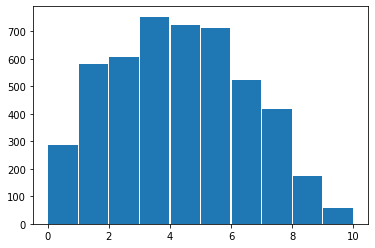

In [64]:
yPred = model.predict(mnistData)
plt.hist(yPred, bins=range(11), rwidth=0.96)

Given equally represented classes, the predicted labels are <span style='color:red'>clearly skewed</span>. From this plot, a possible explanation is that your loss calculation does not appear to be weighting all classes equally. This anomaly is a hint that your loss calculation is incorrect.

Final training loss: 0.12337701767683029
Final validation loss: 0.21156549453735352
Final training accuracy: 0.9620000123977661
Final validation accuracy: 0.949999988079071


FF
FAIL: testMean (__main__.mlTest)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Temp\ipykernel_18424\2563444613.py", line 20, in testMean
    self.assertAlmostEqual(yMean, yMeanActual, delta=deltaMean, msg=errorMsg)
AssertionError: 0.1 != 4.4754 within 0.05 delta (4.3753999985098835 difference) : Mean of predicted values 0.1 and actual values 4.4754 differs by >0.05.

FAIL: testStd (__main__.mlTest)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Temp\ipykernel_18424\2563444613.py", line 10, in testStd
    self.assertAlmostEqual(yStd, yStdActual, delta=deltaStd, msg=errorMsg)
AssertionError: 0.29100493 != 2.914754679214016 within 0.05 delta (2.623749753247753 difference) : Std. dev. of predicted values 0.29100493 and actual values 2.914754679214016 differs by >0.05.

------------------------------

<unittest.runner.TextTestResult run=2 errors=0 failures=2>

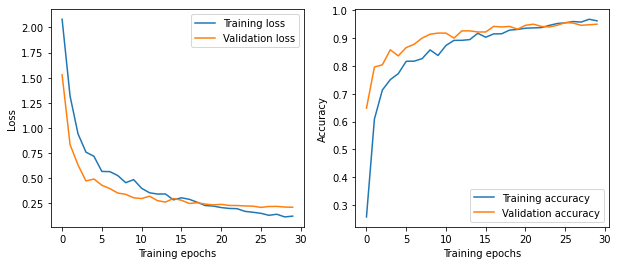

In [72]:
# Train model and run tests
input_dim = mnistData.shape[1]
dropoutLambda = 0.5

model = None

model = keras.Sequential()
model.add(tf.keras.layers.Dense(units=input_dim, activation='relu', input_dim=input_dim))
model.add(tf.keras.layers.Dropout(dropoutLambda, noise_shape=(1, input_dim)))
model.add(tf.keras.layers.Dense(units=int(input_dim/2 +0.5), activation='relu'))
model.add(tf.keras.layers.Dropout(dropoutLambda, noise_shape=(1, int(input_dim/2 +0.5))))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

trainHistory = model.fit(mnistData, mnistLabels, 
                         epochs= 30, batch_size=500, validation_split=0.1, verbose=0)

showClassificationResults(trainHistory)

suite = unittest.TestLoader().loadTestsFromTestCase(mlTest)
unittest.TextTestRunner(verbosity=1, stream=sys.stderr).run(suite)

overfitting을 해결하기 위해서 droupoutLambda 를 변환시키면서(0.1 ~0.5) 확인 필요. model capacity를 줄이면서 시도 필요.

In [ ]:
unittest숙지하여 정리해 놓을 필요 있음.